In [1]:
import pandas as pd
import os

In [2]:
path = "../input/"
os.listdir(path)

['submission_format.csv',
 'train_values.csv',
 'train_labels.csv',
 'test_values.csv']

### train_labels.csv

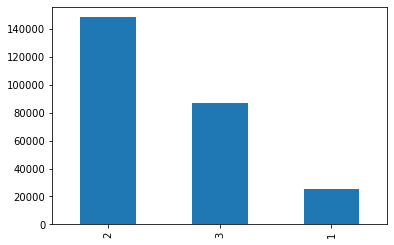

In [3]:
train_labels = pd.read_csv(path+"train_labels.csv")
train_labels.damage_grade.value_counts().plot.bar();

## train_values.csv

In [4]:
train_values = pd.read_csv(path+"train_values.csv")

In [5]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [68]:
def describe_columns(df, label=None):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    
    ### Overview ###
    
    print("Shape:", df.shape, "\n")
    print("Unique dtypes:", df.dtypes.unique(), "\n")
    
    for dtype in df.dtypes.unique():
        print(f"{dtype}: # of columns", df.select_dtypes(include=dtype).shape[1])
    print("\n")
    
    for col in df.columns:
        null_sum = df[col].isnull().sum()
        if null_sum>0:
            print(col, "% missing values:", df[col].isnull().sum()/df.shape[1])
            
    
    fig, ax1 = plt.subplots(figsize=(13,13))
    sns.heatmap(df.select_dtypes(exclude="object").drop(["building_id"], axis=1).corr(), cbar=False, annot=True, fmt=".1f", ax=ax1)
    fig.suptitle("Numerical Features", fontsize=16)
    
    
    cnt=0
    for col in df.select_dtypes(exclude="object").drop(["building_id"], axis=1).columns:
        if len(df[col].unique())==2:
            cnt+=1
    
    print("# Binary columns:", cnt)
    
    try:
    
        dummy_df = df.copy(deep=True)
        dummy_df["damage"] = label.values

        ### Categorical Columns ###

        categorical_levels = []
        label_variance = []

        for col in df.select_dtypes(include="object").columns:
            categorical_levels.append(len(df[col].unique()))

            label_variance.append(dummy_df.groupby(by=col)["damage"].var().values)

        fig, [ax2, ax3, ax4] = plt.subplots(nrows=3, ncols=1, figsize=(18,13), sharex=True)

        ax2.bar(x=range(df.select_dtypes(include="object").shape[1]), height=categorical_levels)
        ax2.set_ylabel("Number of categorical\nlevels", fontsize=15)

        ax3.plot(list(map(lambda col_vals: np.mean(col_vals), label_variance)), "o--")
        ax3.set_ylabel("Label variance\ngroup by column", fontsize=15)

        ax4.boxplot(label_variance, positions=range(df.select_dtypes(include="object").shape[1]))
        ax4.set_ylabel("Label variance\ngrouped by column", fontsize=15)
        ax4.set_xticks(range(df.select_dtypes(include="object").shape[1]))
        ax4.set_xticklabels(df.select_dtypes(include="object").columns, rotation=90, fontsize=13)

        fig.suptitle("Categorical Features", fontsize=16)

        ### Numerical Columns ###
        
        label_variance = []
        binary_cols = []
        for col in df.select_dtypes(exclude="object").drop(["building_id"], axis=1).columns:
            if len(df[col].unique())==2:
                label_variance.append(dummy_df.groupby(by=col)["damage"].var().values)
                binary_cols.append(col)

        fig, ax5 = plt.subplots(figsize=(13,5))
        ax5.plot(list(map(lambda col_vals: col_vals[0], label_variance)), "o--", alpha=0.3)
        ax5.plot(list(map(lambda col_vals: col_vals[1], label_variance)), "o--", alpha=0.3)
        ax5.plot(list(map(lambda col_vals: np.mean(col_vals), label_variance)), "o--")
        ax5.set_xticks(range(len(label_variance)))
        ax5.set_xticklabels(binary_cols, rotation=90)
        ax5.set_ylabel("Label variance\ngrouped by binary", fontsize=15)
        
    except:
        pass

Shape: (260601, 39) 

Unique dtypes: [dtype('int64') dtype('O')] 

int64: # of columns 31
object: # of columns 8


# Binary columns: 22


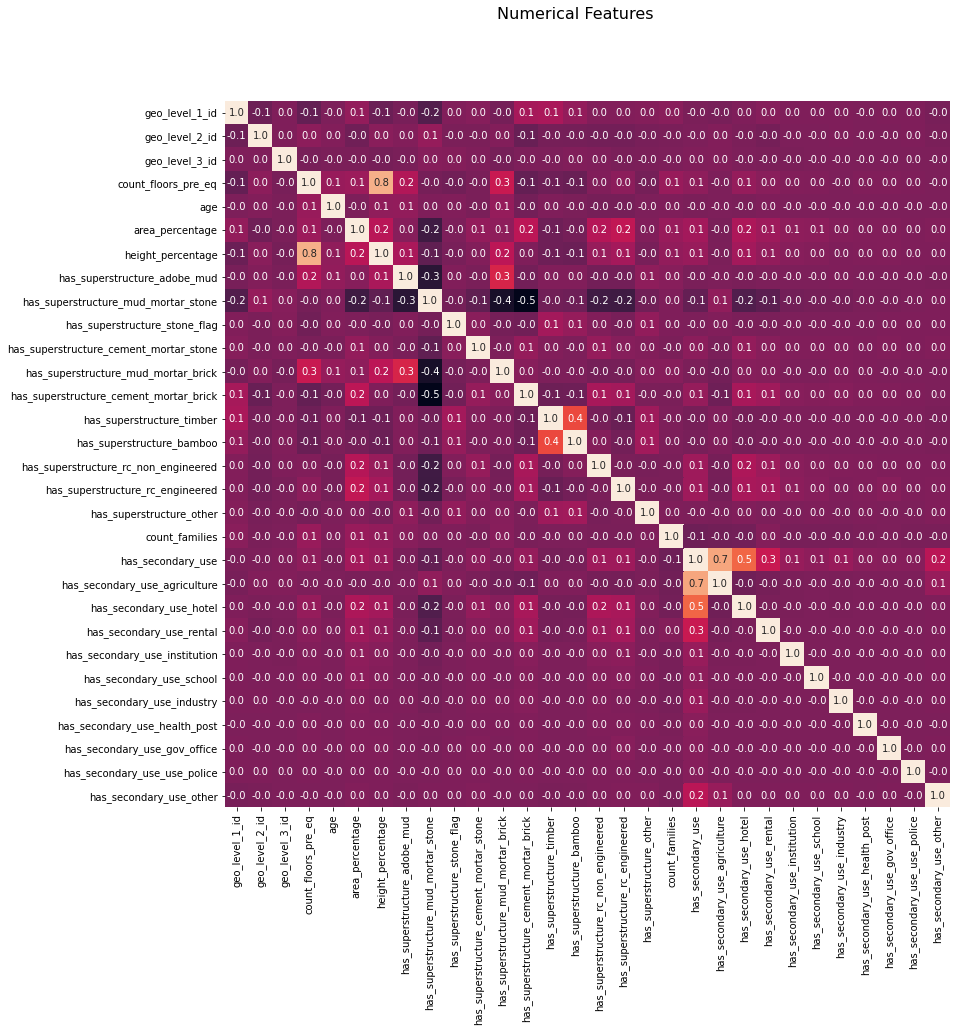

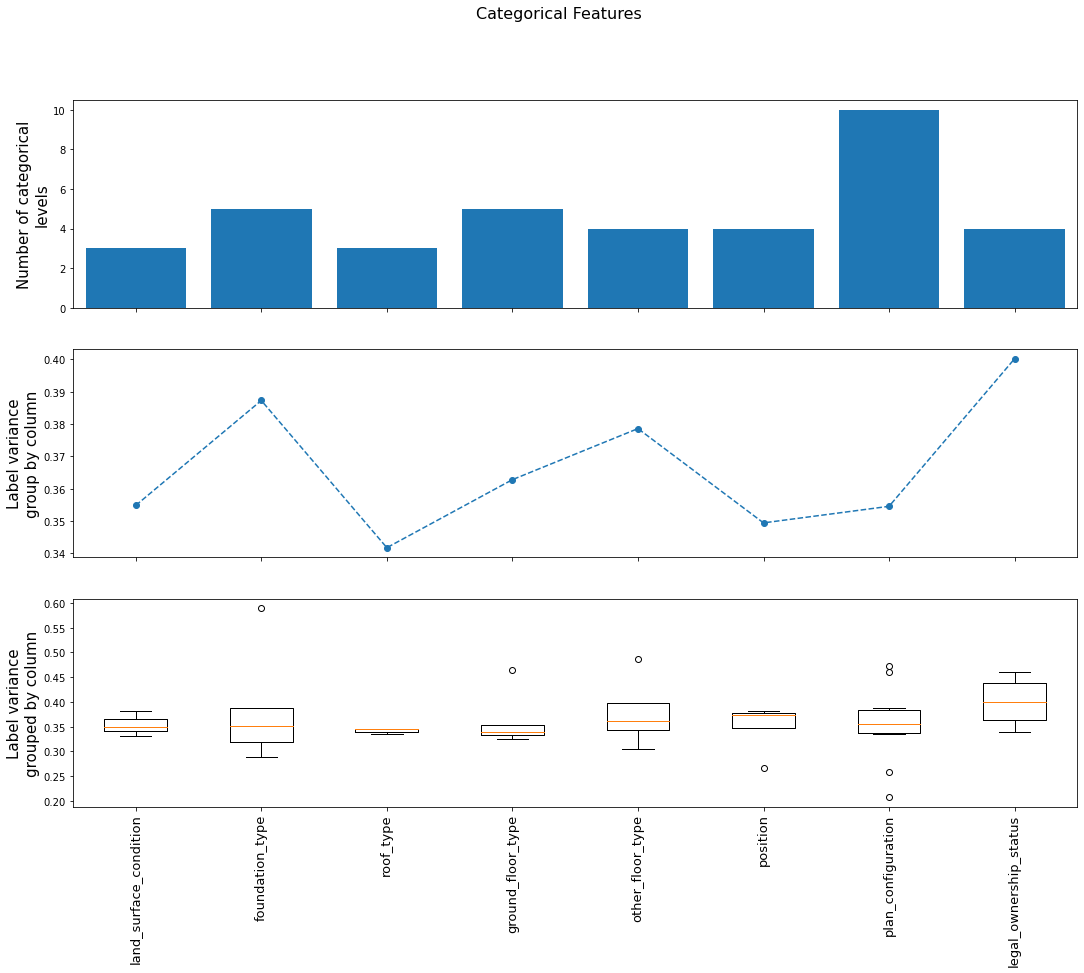

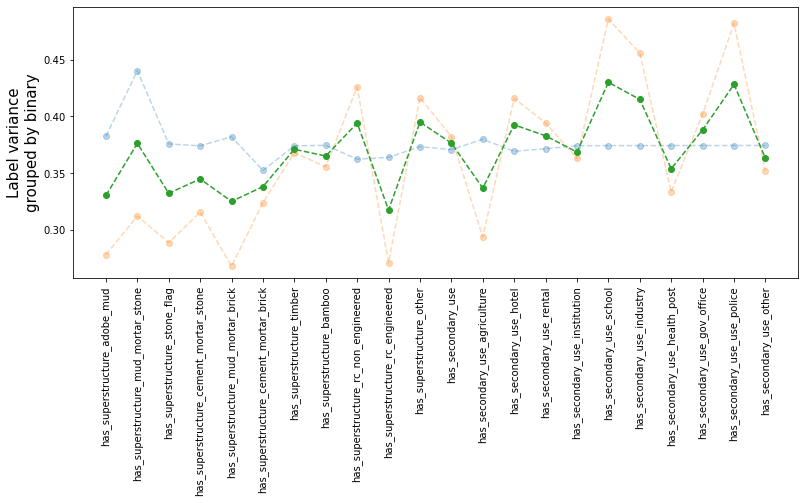

In [69]:
describe_columns(train_values, train_labels["damage_grade"])

## test_values.csv

In [71]:
test_values = pd.read_csv(path+"test_values.csv")

In [73]:
test_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


Shape: (86868, 39) 

Unique dtypes: [dtype('int64') dtype('O')] 

int64: # of columns 31
object: # of columns 8


# Binary columns: 22


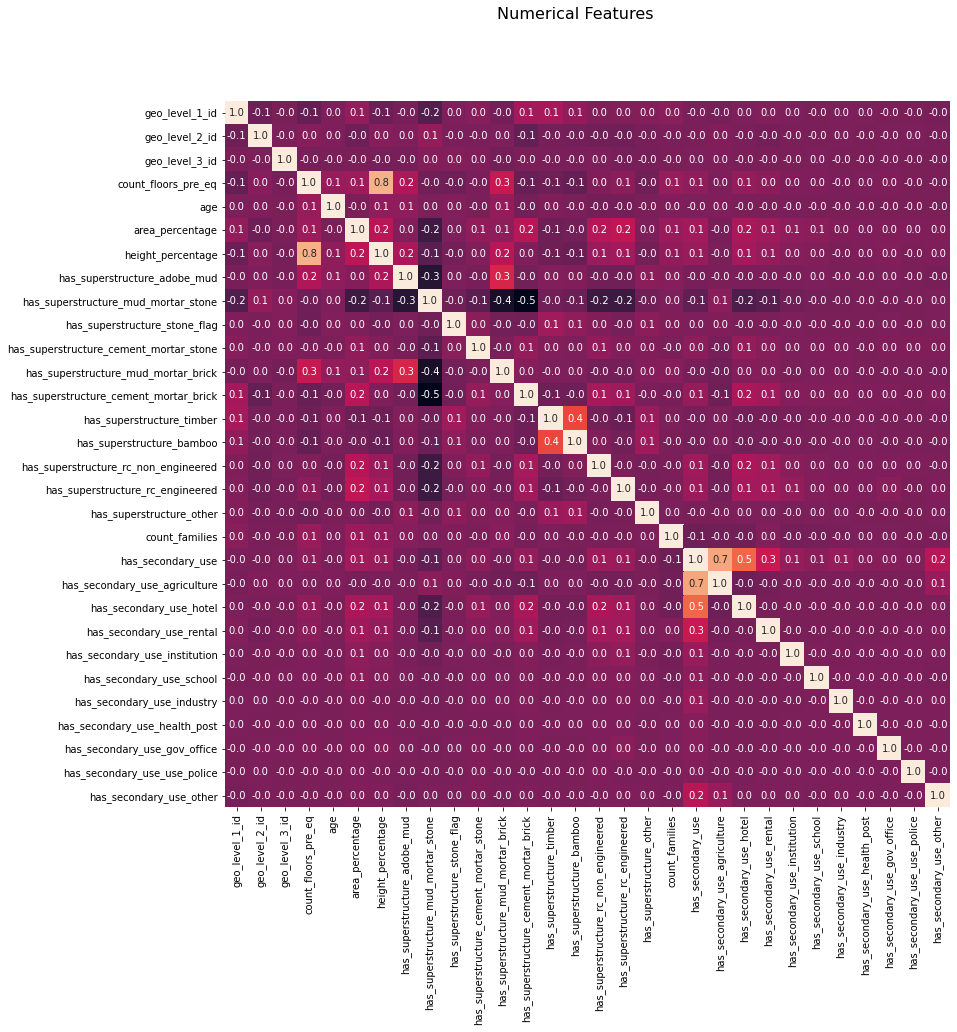

In [74]:
describe_columns(test_values)